Motivated by the understanding being developed on the 2p visual behavior work:

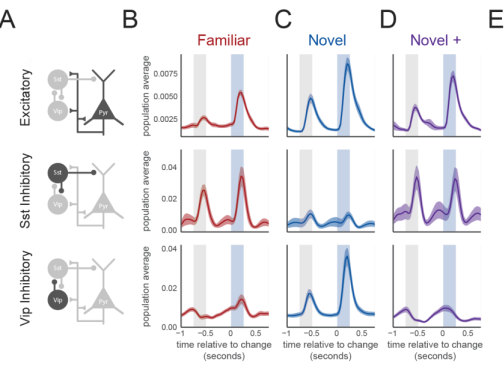

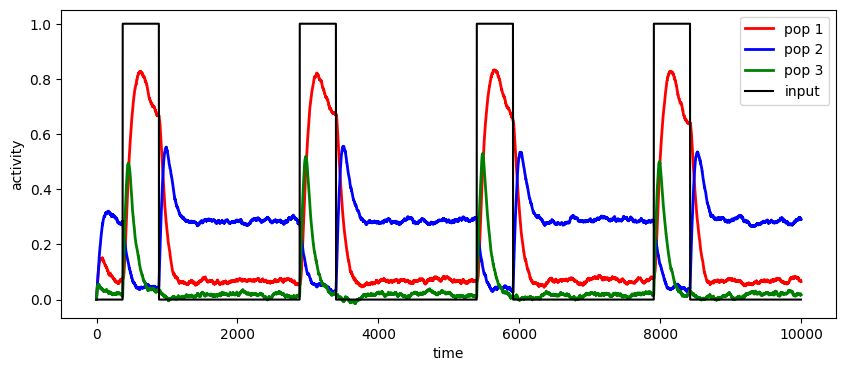

In [53]:
import matplotlib.pyplot as plt
import numpy as np

class RNNsimple:
    '''
    This class implements the simplest possible network model
    '''
    def __init__(self, W, r0):
        self.W = W   # synaptic matrix which couples different populations
        self.r = r0   # firing rate of each population in a vector.
        self.tau = 1  # timescale of the leaking current
        self.dt = 0.01  # lets do euler-mayurama step to start off
        self.N = 3    # number of neurons
        self.noise = 0.1  #added as a noise current
        self.Win = np.reshape(np.array([0,-1,1]), [self.N,1]) # this is an array which specifies how each 
        
    def nonlinearity(self, x, k = 10):
        return 1/(1+np.exp(-k*x))
    
    def drdt(self, I):
        return -self.tau*self.r + self.nonlinearity(self.W.dot(self.r) + I*self.Win) + np.random.normal(0,self.noise, self.r.shape)
        
    def eulermaryarama_simulation(self, timesteps, Input):
        rates_over_time = np.zeros([self.N, timesteps+1])
        rates_over_time[:,0] = self.r.ravel()
        
        for t in range(timesteps):
            self.r = self.r + self.dt* self.drdt(Input[t])
            rates_over_time[:,t+1] = self.r.ravel()
        return rates_over_time
    
    def plot_up_simulation(self, rates_over_time, Input):
        fig, ax = plt.subplots(figsize=[10,4])
        
        ax.plot(rates_over_time[0,:], 'r', label='pop 1', lw=2)
        ax.plot(rates_over_time[1,:], 'b', label='pop 2', lw=2)
        ax.plot(rates_over_time[2,:], 'g', label='pop 3', lw=2)
        ax.plot(Input, 'k', label='input')
        plt.xlabel('time')
        plt.ylabel('activity')
        plt.legend(loc='best')
        plt.show()
                
def main():
    W = np.array([
        [0.1, -1, 1],
        [1, -0.5, -1],
        [-2, -1, 0.1]
    ])
    timesteps = 10000
    amplitude = 1
    Threshold = 0.8
    I = np.array([amplitude*float(s > Threshold) for s in np.sin(np.linspace(0,25,timesteps))])
    
    network = RNNsimple(W, np.zeros([3,1]))
    output = network.eulermaryarama_simulation(timesteps, I)
    network.plot_up_simulation(output, I)
    
    
if __name__ == '__main__':
    main()
        
    


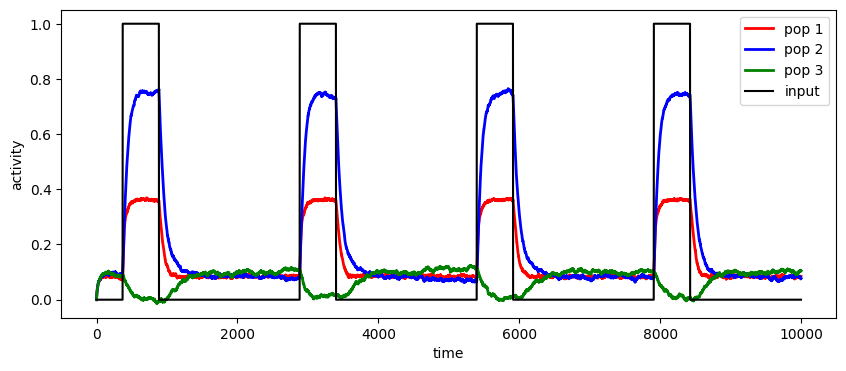

In [66]:
import matplotlib.pyplot as plt
import numpy as np

class RNNsimple:
    '''
    This class implements the simplest possible network model with a first-order euler-mayurama integration scheme.
    '''
    def __init__(self, W, r0):
        self.W = W   # synaptic matrix which couples different populations
        self.r = r0   # firing rate of each population in a vector.
        self.tau = 1  # timescale of the leaking current
        self.dt = 0.01  # lets do euler-mayurama step to start off
        self.N = 3    # number of neurons
        self.noise = 0.1  #added as a noise current
        self.Win = np.reshape(np.array([1,1,0]), [self.N,1]) # this is an array which specifies how each 
        
    def nonlinearity(self, x, k = 10):
        return 1/(1+np.exp(-k*x))
    
    def drdt(self, I):
        return -self.tau*self.r + self.nonlinearity(self.W.dot(self.r) + I*self.Win) + np.random.normal(0,self.noise, self.r.shape)
        
    def eulermaryarama_simulation(self, timesteps, Input):
        rates_over_time = np.zeros([self.N, timesteps+1])
        rates_over_time[:,0] = self.r.ravel()
        
        for t in range(timesteps):
            self.r = self.r + self.dt* self.drdt(Input[t])
            rates_over_time[:,t+1] = self.r.ravel()
        return rates_over_time
    
    def plot_up_simulation(self, rates_over_time, Input):
        fig, ax = plt.subplots(figsize=[10,4])
        
        ax.plot(rates_over_time[0,:], 'r', label='pop 1', lw=2)
        ax.plot(rates_over_time[1,:], 'b', label='pop 2', lw=2)
        ax.plot(rates_over_time[2,:], 'g', label='pop 3', lw=2)
        ax.plot(Input, 'k', label='input')
        plt.xlabel('time')
        plt.ylabel('activity')
        plt.legend(loc='best')
        plt.show()
                
def main():
    W = np.array([
        [-5, 1, 1],
        [-1, -0.7, -1],
        [-1, -1, -0.5]
    ])
    timesteps = 10000
    amplitude = 1
    Threshold = 0.8
    I = np.array([amplitude*float(s > Threshold) for s in np.sin(np.linspace(0,25,timesteps))])
    
    network = RNNsimple(W, np.zeros([3,1]))
    output = network.eulermaryarama_simulation(timesteps, I)
    network.plot_up_simulation(output, I)
    
    
if __name__ == '__main__':
    main()
        
    
